In [1]:
import pandas as pd
import os.path
import numpy as np
import PIL
import glob
from PIL import Image

In [25]:

headers = [
    'analysis_id',
    'distribution',
    'statistic',
    'mc_used', #NEW
    'fold_value', # NEW
    'pointwise', #NEW
    'defaulted', # binary
    'initial_corr',
    'true_corr(TP_FN)',
    'false_corr(FP_TN)',
    'rs_true_corr_TP_FN',
    'rs_false_corr_FP_TN',
    'runtime'
]

    
def parse_log(f, cookd):
    lines = [l.strip() for l in f.readlines()]
    defaulted = False
    if cookd == 'True':
        for l in lines:
            if "defaulted" in l:
                defaulted = True
            elif "initial_corr" in l:
                initial_corr = float(l.split(' ')[-1])
            elif "false correlations according to cookd" in l:
                false_corr = float(l.split(' ')[-1])
            elif "true correlations according to cookd" in l:
                true_corr = float(l.split(' ')[-1])
            elif "runtime" in l:
                runtime = float(l.split(' ')[-1])
        rs_false = np.nan
        rs_true = np.nan

    else:
        # check if FDR correction defaulted
        for l in lines:
            if "defaulted" in l:
                defaulted = True
            elif "initial_corr" in l:
                initial_corr = float(l.split(' ')[-1])
            elif "false correlations" in l:
                false_corr = float(l.split(' ')[-1])
            elif "true correlations" in l:
                true_corr = float(l.split(' ')[-1])
            elif "FP/TN1" in l:
                rs_false = float(l.split(' ')[-1])
            elif "TP/FN1" in l:
                rs_true = float(l.split(' ')[-1])
            elif "runtime" in l:
                runtime = float(l.split(' ')[-1])

    return defaulted, initial_corr, false_corr, true_corr, rs_false, rs_true, runtime


m_to_stat = {
    'kpc': 'pearson',
    'ksc': 'spearman',
    'kkc': 'kendall',
}
for_df = pd.DataFrame()

mcs = ['nomc','fdr']
fvs = ['1','10']
stats = ['kpc','ksc','kkc','rpc','rsc','rkc']
cds = ['True','False']
ds = ['lungpt','lungc','who','hdac']
for mc in mcs:
    for fv in fvs:
        for s in stats:
            for cd in cds:
                for d in ds:
                    # nomc_10_kpc_True_lungpt
                    analysis_id = '_'.join([mc, fv, s, cd, d])
                    path = '/Users/KevinBu/Desktop/clemente_lab/Submissions/CUtIe/final_data_fixed/' + analysis_id + '/'
                    files = sorted(glob.glob(path + '*.txt'))
                    # grab most recent log file
                    try:
                        rel_logfile = files[-1]
                        with open(rel_logfile, 'r') as f:
                            #try: 
                            defaulted, initial_corr, false_corr, true_corr, rs_false, rs_true, runtime = parse_log(f,cd)

                            new_row = pd.DataFrame([[analysis_id, d, s,# m_to_stat[s], 
                                                    mc, fv, cd,
                                                    defaulted, initial_corr, true_corr, false_corr, rs_true, rs_false, runtime]], columns=headers)

                            for_df = for_df.append(new_row)
                            #except: 
                            #    print(analysis_id)
                    except:
                        print(analysis_id)



nomc_1_ksc_True_lungpt
nomc_1_ksc_True_lungc
nomc_1_ksc_True_who
nomc_1_ksc_True_hdac
nomc_1_kkc_True_lungpt
nomc_1_kkc_True_lungc
nomc_1_kkc_True_who
nomc_1_kkc_True_hdac
nomc_1_rpc_True_lungc
nomc_1_rpc_True_who
nomc_1_rsc_True_lungpt
nomc_1_rsc_True_lungc
nomc_1_rsc_True_who
nomc_1_rsc_True_hdac
nomc_1_rsc_False_lungc
nomc_1_rkc_True_lungpt
nomc_1_rkc_True_lungc
nomc_1_rkc_True_who
nomc_1_rkc_True_hdac
nomc_1_rkc_False_lungc
nomc_10_ksc_True_lungpt
nomc_10_ksc_True_lungc
nomc_10_ksc_True_who
nomc_10_ksc_True_hdac
nomc_10_kkc_True_lungpt
nomc_10_kkc_True_lungc
nomc_10_kkc_True_who
nomc_10_kkc_True_hdac
nomc_10_rpc_True_lungc
nomc_10_rpc_True_who
nomc_10_rsc_True_lungpt
nomc_10_rsc_True_lungc
nomc_10_rsc_True_who
nomc_10_rsc_True_hdac
nomc_10_rsc_False_lungc
nomc_10_rkc_True_lungpt
nomc_10_rkc_True_lungc
nomc_10_rkc_True_who
nomc_10_rkc_True_hdac
nomc_10_rkc_False_lungc
fdr_1_ksc_True_lungpt
fdr_1_ksc_True_lungc
fdr_1_ksc_True_who
fdr_1_ksc_True_hdac
fdr_1_kkc_True_lungpt
fdr_1_kkc_Tr

In [28]:
for_df.head()

,analysis_id,distribution,statistic,mc_used,fold_value,pointwise,defaulted,initial_corr,true_corr(TP_FN),false_corr(FP_TN),rs_true_corr_TP_FN,rs_false_corr_FP_TN,runtime
0,nomc_1_kpc_True_lungpt,lungpt,kpc,nomc,1,True,False,4524.0,388.0,4136.0,NaN,NaN,202.581031
0,nomc_1_kpc_True_lungc,lungc,kpc,nomc,1,True,False,12042.0,691.0,11351.0,NaN,NaN,1223.083960
0,nomc_1_kpc_True_who,who,kpc,nomc,1,True,False,28834.0,0.0,28834.0,NaN,NaN,2806.209940
0,nomc_1_kpc_True_hdac,hdac,kpc,nomc,1,True,False,2362.0,2294.0,68.0,NaN,NaN,673.096098
0,nomc_1_kpc_False_lungpt,lungpt,kpc,nomc,1,False,False,4524.0,305.0,4219.0,0.0,2705.0,41.302499


In [29]:
for_df.to_csv('/Users/KevinBu/Desktop/clemente_lab/Submissions/CUtIe/final_data_fixed/final_real_df.txt', sep = '\t', index = False)

In [51]:
header = [
    'Micrometa',
    'Microbiome',
    'Gene Expression',
    'WHO'
]

index1 = [
    'Pearson_cd_nomc',
    '% initial sig',
    'Pearson_fv1_nomc',
    '% initial sig',
    'Pearson_fv10_nomc',
    '% initial sig']
#    'Spearman',
#    '% initial sig',
#    'Kendall',
#    '% initial sig',
#    'MIC',
#    '% initial sig',

index2 = [
    'Pearson_cd_fdr',
    '% initial sig',
    'Pearson_fv1_fdr',
    '% initial sig',
    'Pearson_fv10_fdr',
    '% initial sig']

index3 = [
    'Pearson_cd_nomc',
    '% initial sig',
    'Pearson_fv1_nomc',
    '% initial sig',
    'Pearson_fv10_nomc',
    '% initial sig',
    'Spearman_fv1_nomc',
    '% initial sig',
    'Spearman_fv10_nomc',
    '% initial sig',
    'Kendall_fv1_nomc',
    '% initial sig',
    'Kendall_fv10_nomc',
    '% initial sig']

index4 = [
    'Pearson_cd_fdr',
    '% initial sig',
    'Pearson_fv1_fdr',
    '% initial sig',
    'Pearson_fv10_fdr',
    '% initial sig',
    'Spearman_fv1_fdr',
    '% initial sig',
    'Spearman_fv10_fdr',
    '% initial sig',
    'Kendall_fv1_fdr',
    '% initial sig',
    'Kendall_fv10_fdr',
    '% initial sig']


index5 = [
    'Pearson_fv1_nomc',
    '% initial insig',
    'Pearson_fv10_nomc',
    '% initial insig',
    'Spearman_fv1_nomc',
    '% initial insig',
    'Spearman_fv10_nomc',
    '% initial insig',
    'Kendall_fv1_nomc',
    '% initial insig',
    'Kendall_fv10_nomc',
    '% initial insig']

index6 = [
    'Pearson_fv1_fdr',
    '% initial insig',
    'Pearson_fv10_fdr',
    '% initial insig',
    'Spearman_fv1_fdr',
    '% initial insig',
    'Spearman_fv10_fdr',
    '% initial insig',
    'Kendall_fv1_fdr',
    '% initial insig',
    'Kendall_fv10_fdr',
    '% initial insig']

index7 = [
    'Pearson_cd_fdr',
    '% initial sig',
    'Pearson_fv10_fdr',
    '% initial insig',
    'Spearman_fv10_fdr',
    '% initial insig',
    'Kendall_fv10_fdr',
    '% initial insig']
dists = ['lungpt', 'lungc', 'hdac', 'who'] 
# method = ['cutie','cookd']# 'jackknife', 'bootstrap', 'cookd']
dist_to_corr = {
    'lungpt': 83 * 897,
    'lungc': 748 * 747 / 2,
    'hdac': 100 * 99 / 2,
    'who': 354 * 353 / 2
}
ids1 = ['nomc_1_kpc_True', 
        'nomc_1_kpc_False',
        'nomc_10_kpc_False']
ids2 = ['fdr_1_kpc_True',
        'fdr_1_kpc_False',
        'fdr_10_kpc_False']
ids3 = ['nomc_1_kpc_True', 
        'nomc_1_kpc_False',
        'nomc_10_kpc_False',
        'nomc_1_ksc_False',
        'nomc_10_ksc_False',
        'nomc_1_kkc_False',
        'nomc_10_kkc_False']
ids4 = ['fdr_1_kpc_True', 
        'fdr_1_kpc_False',
        'fdr_10_kpc_False',
        'fdr_1_ksc_False',
        'fdr_10_ksc_False',
        'fdr_1_kkc_False',
        'fdr_10_kkc_False']
ids5 = ['nomc_1_rpc_False',
        'nomc_10_rpc_False',
        'nomc_1_rsc_False',
        'nomc_10_rsc_False',
        'nomc_1_rkc_False',
        'nomc_10_rkc_False']
ids6 = ['fdr_1_rpc_False',
        'fdr_10_rpc_False',
        'fdr_1_rsc_False',
        'fdr_10_rsc_False',
        'fdr_1_rkc_False',
        'fdr_10_rkc_False']
ids7 = ['fdr_1_kpc_True', 
        'fdr_10_kpc_False',
        'fdr_10_ksc_False',
        'fdr_10_kkc_False']
# ids8 for TN FN sep coming soon to a jupyter lab near you



id_sets = [ids1, ids2, ids3, ids4, ids5, ids6, ids7]
indices = [index1, index2, index3, index4, index5, index6, index7]
new_dfs = []
for i in range(len(id_sets)):
    id_set = id_sets[i]
    df_array = []
    for idstring in id_set:
        # stat = 'Pearson'
        row_fracs = []
        mc, fv, s, cd = idstring.split('_')
        for dist in dists:
            row = for_df[(for_df['distribution'] == dist) & (for_df['statistic'] == s) \
                         & (for_df['mc_used'] == mc) & (for_df['fold_value'] == fv) & (for_df['pointwise'] == cd)] 
            try:
                row_fracs.append(float(row['true_corr(TP_FN)'] /row['initial_corr'].values)) # correctly id tp
            except:
                row_fracs.append(np.nan)
                print(dist, idstring)
                
        df_array.append(row_fracs)    

        initial_sig_fracs = []
        for dist in dists:
            row = for_df[(for_df['distribution'] == dist) & (for_df['statistic'] == s) \
                         & (for_df['mc_used'] == mc) & (for_df['fold_value'] == fv) & (for_df['pointwise'] == cd)] 
            # change number 249500 to n_corr depending on dataset
            try:
                initial_sig_fracs.append(float(row['initial_corr'] / dist_to_corr[dist]))
            except:
                initial_sig_fracs.append(np.nan)
            
        df_array.append(initial_sig_fracs)
    
    new_df = pd.DataFrame(data = df_array, index = indices[i], columns = header) 
    new_df = new_df.rename_axis('Statistic')
    new_dfs.append(new_df)
#new_df



lungc nomc_1_rsc_False
lungc nomc_10_rsc_False
lungc nomc_1_rkc_False
lungc nomc_10_rkc_False
lungc fdr_1_rsc_False
lungc fdr_10_rsc_False
lungc fdr_1_rkc_False
lungc fdr_10_rkc_False


In [52]:
new_dfs[0]

,Micrometa,Microbiome,Gene Expression,WHO
Statistic,,,,
Pearson_cd_nomc,0.085765,0.057382,0.971211,0.000000
% initial sig,0.060765,0.043103,0.477172,0.461484
Pearson_fv1_nomc,0.067418,0.109616,0.837003,0.847437
% initial sig,0.060765,0.043103,0.477172,0.461484
Pearson_fv10_nomc,0.112290,0.141339,0.982218,0.956614
% initial sig,0.060765,0.043103,0.477172,0.461484


In [32]:
new_dfs[1]

,Micrometa,Microbiome,Gene Expression,WHO
Statistic,,,,
Pearson_cd_fdr,0.036960,0.025704,0.969918,0.000000
% initial sig,0.038522,0.013856,0.206100,0.200269
Pearson_fv1_fdr,0.026499,0.071429,0.841824,0.853792
% initial sig,0.038522,0.013856,0.206100,0.200269
Pearson_fv10_fdr,0.032427,0.075820,0.978166,0.951930
% initial sig,0.038522,0.013856,0.206100,0.200269


In [33]:
new_dfs[2]

,Micrometa,Microbiome,Gene Expression,WHO
Statistic,,,,
Pearson_cd_nomc,0.085765,0.057382,0.971211,0.000000
% initial sig,0.060765,0.021551,0.236200,0.230742
Pearson_fv1_nomc,0.067418,0.109616,0.837003,0.847437
% initial sig,0.060765,0.021551,0.236200,0.230742
Pearson_fv10_nomc,0.112290,0.141339,0.982218,0.956614
% initial sig,0.060765,0.021551,0.236200,0.230742
Spearman_fv1_nomc,0.289862,0.358142,0.948298,0.934882
% initial sig,0.029147,0.054899,0.237900,0.301332
Spearman_fv10_nomc,1.000000,0.503472,1.000000,0.999469


In [34]:
new_dfs[3]

,Micrometa,Microbiome,Gene Expression,WHO
Statistic,,,,
Pearson_cd_fdr,0.036960,0.025704,0.969918,0.000000
% initial sig,0.038522,0.013856,0.206100,0.200269
Pearson_fv1_fdr,0.026499,0.071429,0.841824,0.853792
% initial sig,0.038522,0.013856,0.206100,0.200269
Pearson_fv10_fdr,0.032427,0.075820,0.978166,0.951930
% initial sig,0.038522,0.013856,0.206100,0.200269
Spearman_fv1_fdr,0.289862,0.321227,0.947139,0.937884
% initial sig,0.029147,0.025328,0.206200,0.284198
Spearman_fv10_fdr,1.000000,0.400862,1.000000,0.999437


In [53]:
new_dfs[6].to_csv('/Users/KevinBu/Desktop/clemente_lab/Submissions/CUtIe/final_data_fixed/real_tpfp.csv', index = True)

In [20]:

headers = [
    'analysis_id',
    'distribution',
    'statistic',
    'defaulted', # binary
    'initial_corr',
    'true_corr(TP_FN)',
    'false_corr(FP_TN)',
    'rs_true_corr_TP_FN',
    'rs_false_corr_FP_TN',
    'runtime'
]

    
def parse_log(f):
    lines = [l.strip() for l in f.readlines()]
    defaulted = False
    # check if FDR correction defaulted
    for l in lines:
        if "defaulted" in l: 
            defaulted = True
        elif "initial_corr" in l:
            initial_corr = float(l.split(' ')[-1])
        elif "false correlations" in l:
            false_corr = float(l.split(' ')[-1])
        elif "true correlations" in l:
            true_corr = float(l.split(' ')[-1])
        elif "FP/TN1" in l:
            rs_false = float(l.split(' ')[-1])
        elif "TP/FN1" in l:
            rs_true = float(l.split(' ')[-1])
        elif "runtime" in l:
            runtime = float(l.split(' ')[-1])
            
    return defaulted, initial_corr, false_corr, true_corr, rs_false, rs_true, runtime


m_to_stat = {
    'rpc': 'pearson',
    'rsc': 'spearman',
    'rkc': 'kendall',
    'rmine': 'mine'        
}
rev_df = pd.DataFrame()

for dataset in rev_stat_df.columns.values[1:4]:
    # statistic = 'pearson'
    subset_df = rev_stat_df.set_index('statistic').loc[:,dataset]
    rev_subset_df = rev_stat_df.set_index('statistic').loc[:,dataset]
        
    # for each distribution
#    for dist in distributions:
 #       # dist = 'sim_copula_n50_norm_0_1'
        
    for m in rev_subset_df:
        # m = 'kpc'
        path = '../Submissions/CUtIe/final_data_fixed/cutie_' + m + '1fdr0.05/'
        analysis_id = str('cutie_' + m + '1fdr0.05')
        files = sorted(glob.glob(path + '*.txt'))
        # grab most recent log file
        rel_logfile = files[-1]
        with open(rel_logfile, 'r') as f:
            try: 
                defaulted, initial_corr, false_corr, true_corr, rs_false, rs_true, runtime = parse_log(f)

                new_row = pd.DataFrame([[analysis_id, dataset, m_to_stat[m.split('_')[-1]], 
                                        defaulted, initial_corr, true_corr, false_corr, rs_true, rs_false, runtime]], columns=headers)

                rev_df = rev_df.append(new_row)
            except: 
                print(analysis_id)
                


In [21]:
rev_df.head()

,analysis_id,distribution,statistic,defaulted,initial_corr,true_corr(TP_FN),false_corr(FP_TN),rs_true_corr_TP_FN,rs_false_corr_FP_TN,runtime
0,cutie_lungc_rpc1fdr0.05,lungc,pearson,False,271649.0,6630.0,265019.0,156913.0,5071.0,5147.498753
0,cutie_lungc_rsc1fdr0.05,lungc,spearman,False,265226.0,4762.0,260464.0,159353.0,2485.0,18906.387469
0,cutie_lungc_rkc1fdr0.05,lungc,kendall,False,265560.0,4657.0,260903.0,159667.0,2433.0,13295.851605
0,cutie_lungc_rmine1fdr0.05,lungc,mine,False,279088.0,169.0,278919.0,126225.0,0.0,40533.794726
0,cutie_hdac_rpc1fdr0.05,hdac,pearson,False,2889.0,384.0,2505.0,653.0,3.0,178.345826


In [22]:
rev_df.to_csv('/Users/KevinBu/Desktop/clemente_lab/Submissions/CUtIe/final_data_fixed/final_real_df_rev.txt', sep = '\t', index = False)

In [23]:
header = [
    'Microbiome',
    'Gene Expression',
    'WHO'
]

index = [
    'Pearson',
    '% initial insig',
    'Spearman',
    '% initial insig',
    'Kendall',
    '% initial insig',
    'MIC',
    '% initial insig',

]
dists = ['lungc', 'hdac', 'who'] 
method = ['cutie', 'jackknife', 'bootstrap', 'cookd']
dist_to_corr = {
    'lungc': 748 * 747,
    'hdac': 100 * 100,
    'who': 354 * 353
}

df_array = []
for stat in rev_stat_df['statistic']:
    # stat = 'Pearson'
    row_fracs = []
    for dist in dists:
        row = rev_df[(rev_df['distribution'] == dist) & (rev_df['statistic'] == stat)] 
        try:
            row_fracs.append(float(row['true_corr(TP_FN)'] /row['initial_corr'].values)) # correctly id tp
        except:
            row_fracs.append(np.nan)
    df_array.append(row_fracs)
    
    initial_sig_fracs = []
    for dist in dists:
        row = rev_df[(rev_df['distribution'] == dist) & (rev_df['statistic'] == stat)] 
        # change number 249500 to n_corr depending on dataset
        try:
            initial_sig_fracs.append(float(row['initial_corr'] / dist_to_corr[dist]))
        except:
            initial_sig_fracs.append(np.nan)
    df_array.append(initial_sig_fracs)
    
new_df = pd.DataFrame(data = df_array, index = index, columns = header) 
new_df = new_df.rename_axis('Statistic')
#new_df



In [24]:
new_df.to_csv('/Users/KevinBu/Desktop/clemente_lab/Submissions/CUtIe/final_data_fixed/real_tnfn.csv', index = True)

In [7]:
ids

['nomc_1_kpc_True',
 'nomc_1_kpc_False',
 'nomc_10_kpc_True',
 'nomc_10_kpc_False',
 'fdr_1_kpc_True',
 'fdr_1_kpc_False',
 'fdr_10_kpc_True',
 'fdr_10_kpc_False']

In [8]:
for idstring in ids:
    print(idstring)

nomc_1_kpc_True
nomc_1_kpc_False
nomc_10_kpc_True
nomc_10_kpc_False
fdr_1_kpc_True
fdr_1_kpc_False
fdr_10_kpc_True
fdr_10_kpc_False


In [2]:
import seaborn as sns
import pandas as pd

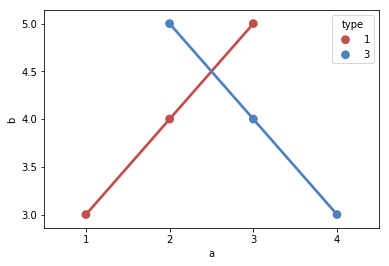

In [6]:
df = pd.DataFrame({'a':[1,2,3,2,3,4],'b':[3,4,5,5,4,3],'type':[1,1,1,3,3,3]})
colors = ['#4F81BD','#C0504D']
sns.pointplot(data=df,x='a',y='b',hue='type',palette=sns.color_palette(colors))
